#**Drive mount**

In [ ]:
from google.colab import drive
import shutil
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ssqueezepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.4 MB/s 


In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import os
import random
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import skimage
import matplotlib.pyplot as plt
import itertools
import torch
import torchvision
from torchvision.transforms import transforms
from torchvision import utils
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from scipy import signal
import matplotlib.pyplot as plt
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import PIL
from PIL import Image
import glob


# Checking number of files in train, test, val

In [ ]:
# folder path
num_sub = str(num_sub)
   = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/nonsocial'
train_social = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/social'
test_nonsocial = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/nonsocial'
test_social = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/social'
val_nonsocial = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/nonsocial'
val_social = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/social'

num_of_files = 0
# Iterate directory
for path in os.listdir(train_nonsocial):
    # check if current path is a file
    if os.path.isfile(os.path.join(train_nonsocial, path)):
        num_of_files += 1
print('Train Non Social files', num_of_files)

num_of_files = 0
# Iterate directory
for path in os.listdir(train_social):
    # check if current path is a file
    if os.path.isfile(os.path.join(train_social, path)):
        num_of_files += 1
print('Train Social files', num_of_files)

num_of_files = 0
# Iterate directory
for path in os.listdir(test_nonsocial):
    # check if current path is a file
    if os.path.isfile(os.path.join(test_nonsocial, path)):
        num_of_files += 1
print('Test Non Social files', num_of_files)

num_of_files = 0
# Iterate directory
for path in os.listdir(test_social):
    # check if current path is a file
    if os.path.isfile(os.path.join(test_social, path)):
        num_of_files += 1
print('Test Social files', num_of_files)

num_of_files = 0
# Iterate directory
for path in os.listdir(val_nonsocial):
    # check if current path is a file
    if os.path.isfile(os.path.join(val_nonsocial, path)):
        num_of_files += 1
print('Val Non Social files', num_of_files)

num_of_files = 0
# Iterate directory
for path in os.listdir(val_social):
    # check if current path is a file
    if os.path.isfile(os.path.join(val_social, path)):
        num_of_files += 1
print('Val Social files', num_of_files)

Train Non Social files 78
Train Social files 79
Test Non Social files 22
Test Social files 22
Val Non Social files 11
Val Social files 11


In [ ]:
num_sub = 5

In [ ]:
SUBJECTS_FOLDER = '/content/drive/MyDrive/Tirocinio/Datasets/Social memory cuing full dataset/derivatives/EEGPreprocessedDataTableStudy'
if num_sub <= 9:
  num_sub = str(num_sub)
  SINGLE_SUBJECT = os.path.join(SUBJECTS_FOLDER, "sub-0" + num_sub + "/ProcessedData/data_ica.mat")
  print('Minore di 10')

else:
  num_sub = str(num_sub)
  SINGLE_SUBJECT = os.path.join(SUBJECTS_FOLDER, "sub-" + num_sub + "/ProcessedData/data_ica.mat")
  print('Maggiore = di 10')

#SUBJECTS = [ name for name in os.listdir(SUBJECTS_FOLDER) if os.path.isdir(os.path.join(SUBJECTS_FOLDER, name)) ]
#SUBJECTS.sort()
DATA = "ProcessedData/data_ica.mat"

Minore di 10


In [ ]:
mat = scipy.io.loadmat(SINGLE_SUBJECT)
trial = mat['trial']
trialinfo = mat['trialinfo']

In [ ]:
trial = np.transpose(np.squeeze(trial))
trials = []
labels = []
NUM_CHANNELS = 29
NUM_TRIAL = 224
cueing_fase = range(1250,1750)
for i, t in enumerate(trial):
  trials.append(t[ :NUM_CHANNELS, cueing_fase])
  labels.append(trialinfo[i, 5]-1)  #zero is stick, one is avatar --- the -1 to have labels with 0 or 1 values (in dataset are 1 and 2)

trials = list(signal.decimate(np.transpose(trials, [0, 2, 1]), 4, axis = 1)) #downsampling


print(np.shape(trials[0]))


(125, 29)


In [ ]:
print(f'Shape trials: ', np.shape(trials))
print(f'Shape trial: ', np.shape(trials[0]))
print(f'Shape riga trial: ', np.shape(trials[0][0]))
print()
print(type(trials))
print(type(trials[0][0][0]))
print(trials[0][0])


Shape trials:  (224, 125, 29)
Shape trial:  (125, 29)
Shape riga trial:  (29,)

<class 'list'>
<class 'numpy.float64'>
[-42.61463921 -31.46198747 -56.00053804  -7.69743213  -3.54184182
  -4.4023199   -6.22307626 -19.10046335   6.89144429  -3.04497635
  -1.93621139   3.5814017   14.67653137   3.64685107   0.27775719
   6.32569456   8.39350586   5.88913852   5.66879864   6.38053792
  10.92623594   8.64150507   7.85965478   8.88643233  11.02200811
  10.43270732   8.85590631   5.34318613  13.79474039]


Sub Dispari

<class 'numpy.ndarray'>


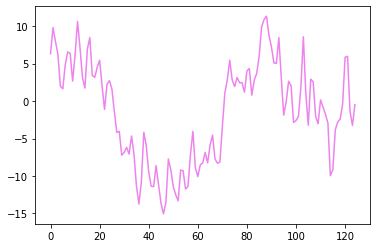

In [ ]:
if labels[0] == 0 and labels[112] == 1:
  print('Sub Dispari')

if labels[0] == 1 and labels[112] == 0:
  print('Sub Pari')

print()
print(type(trials[0]))

#plt.plot(trials[1][:, 0])
plt.plot(trials[0][:, 15:16], color='violet')
#plt.plot(trials[0][:, 0])

# **Trasformazione trial in CWT**

In [ ]:
trials_cwt = []

for idx_trial in range(NUM_TRIAL):
  trial = trials[idx_trial]
  trial_cwt = []

  for idx_col in range(NUM_CHANNELS):
    new_col = []
    for row in trial:
      new_col.append(row[idx_col])

    new_col = np.array(new_col)
    new_col, scales = cwt(new_col, wavelet = 'morlet')
    new_col = abs(new_col)
    trial_cwt.append(new_col)

  trials_cwt.append(trial_cwt)

In [ ]:

print(f'Shape di trials_cwt: ', np.shape(trials_cwt))
#print(f'Trial trasformato in colonna: ', trial_cwt)
print(f'Shape di un trial_cwt: ', np.shape(trial_cwt))
trial_cwt_trp = np.transpose(trial_cwt)
print(f'Shape di un trial_cwt trasposto: ', np.shape(trial_cwt_trp))
print(f'Type di un trial_cwt: ', type(trial_cwt))
print(f'Shape di una colonna di un trial_cwt trasposto: ', np.shape(trial_cwt_trp[0]))
print(f'Shape di una colonna di un trial_cwt: ', np.shape(trial_cwt[0]))
print(np.shape(trials_cwt[0][14]))

Shape di trials_cwt:  (224, 29, 195, 125)
Shape di un trial_cwt:  (29, 195, 125)
Shape di un trial_cwt trasposto:  (125, 195, 29)
Type di un trial_cwt:  <class 'list'>
Shape di una colonna di un trial_cwt trasposto:  (195, 29)
Shape di una colonna di un trial_cwt:  (195, 125)
(195, 125)


In [ ]:
cmap = plt.cm.jet
plt.imshow(trials_cwt[0][1], aspect='auto', cmap='jet')
plt.xlabel('sample')
plt.ylabel('scale')
plt.colorbar()

In [ ]:
def tensor_to_image(tensor):
  if type(tensor) == torch.tensor:
    pass
  else:
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

**Se sub pari o dispari, salvo le immagini nelle rispettive cartelle**

In [ ]:
#Se SUB DISPARI
if labels[0] == 0 and labels[112] == 1:


  NOGRID_TRAIN_RANGE_NONS = range(0,79)
  nogrid_path_train_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/train/nonsocial'
  grid_path_train_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/nonsocial'
  NOGRID_TRAIN_RANGE_S = range(112,191)
  nogrid_path_train_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/train/social'
  grid_path_train_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/social'

  NOGRID_TEST_RANGE_NONS = range(79,101)
  nogrid_path_test_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/test/nonsocial'
  grid_path_test_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/nonsocial'
  NOGRID_TEST_RANGE_S = range(191,213)
  nogrid_path_test_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/test/social'
  grid_path_test_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/social'

  NOGRID_VAL_RANGE_NONS = range(101,112)
  nogrid_path_val_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/val/nonsocial'
  grid_path_val_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/nonsocial'
  NOGRID_VAL_RANGE_S = range(213,224)
  nogrid_path_val_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/val/social'
  grid_path_val_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/social'

  for t in NOGRID_TRAIN_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_train_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_train_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')


  for t in NOGRID_TRAIN_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_train_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_train_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_TEST_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_test_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_test_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_TEST_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_test_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_test_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_VAL_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_val_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_val_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_VAL_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_val_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_val_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

else:
  print('Hai sbagliato cella, era pari')

In [ ]:
#Se SUB PARI
if labels[0] == 1 and labels[112] == 0:


  NOGRID_TRAIN_RANGE_S = range(0,79)
  nogrid_path_train_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/train/social'
  grid_path_train_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/social'

  NOGRID_TRAIN_RANGE_NONS = range(112,191)
  nogrid_path_train_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/train/nonsocial'
  grid_path_train_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/train/nonsocial'

  NOGRID_TEST_RANGE_S = range(79,101)
  nogrid_path_test_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/test/social'
  grid_path_test_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/social'

  NOGRID_TEST_RANGE_NONS = range(191,213)
  nogrid_path_test_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/test/nonsocial'
  grid_path_test_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/test/nonsocial'

  NOGRID_VAL_RANGE_S = range(101,112)
  nogrid_path_val_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/val/social'
  grid_path_val_s = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/social'

  NOGRID_VAL_RANGE_NONS = range(213,224)
  nogrid_path_val_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid/sub' + num_sub + '/val/nonsocial'
  grid_path_val_nons = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/Grid/sub' + num_sub + '/val/nonsocial'

  for t in NOGRID_TRAIN_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_train_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_train_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_TRAIN_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_train_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_train_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')


  for t in NOGRID_TEST_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_test_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_test_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_TEST_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_test_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_test_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')


  for t in NOGRID_VAL_RANGE_S:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_val_s + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_val_s + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

  for t in NOGRID_VAL_RANGE_NONS:
    images = []
    for r in range(NUM_CHANNELS):
      trials_cwt[t][r] = torch.from_numpy(trials_cwt[t][r])
      image = tensor_to_image(trials_cwt[t][r])
      image = image.resize((224, 224))
      image = nogrid_path_val_nons + '/trial_' + str(t) + '_num channel_' + str(r) + '.png'
      plt.imsave(image, trials_cwt[t][r], cmap=cmap)

      img = torch.tensor(plt.imread(image))
      img = img.permute(2, 0, 1)
      images.append(img)

    grid = torchvision.utils.make_grid(images, nrow = 6)
    plt.figure(figsize=(11,11))
    #plt.imshow(np.transpose(grid, (1,2,0)), aspect='auto', cmap= 'jet')
    plt.imsave(grid_path_val_nons + '/grid_trial' + str(t) + '.png', np.transpose(grid, (1,2,0)).numpy(), cmap= 'jet')

else:
  print('Hai sbagliato cella, era dispari')

*Creazione Cartelle per Dataset*

In [ ]:
SUBJ_RANGE = range(1,51)

grid_path = '/content/drive/MyDrive/Tirocinio/Datasets/SocialMemoryImgs/Wavelet_Abs_Plt_Jet/NoGrid'
train_test_val = ['train', 'test', 'val']
nonsocial_social = ['nonsocial','social']
for sub in SUBJ_RANGE:
  if sub == 1 or sub == 2 or sub == 7 or sub == 8 or sub == 16 or sub == 17 or sub == 36 or sub == 42 or sub == 47:
    continue
  else:
    os.mkdir(grid_path + '/sub' + str(sub))
    sub_path = grid_path + '/sub' + str(sub)
    for ttv in train_test_val:
      path = os.path.join(sub_path, ttv)
      os.mkdir(path)
      for nss in nonsocial_social:
        path_s = os.path.join(path, nss)
        os.mkdir(path_s)

In [ ]:
m = [[1,2,3],
     [4,5,6],
     [7,8,9]]

m_trasp = []

print(np.shape(m))
num_col = range(3)

for c in range(num_col):
  new_col  = []
  for r in m:
    new_col.append(r[c])
  new_col = np.transpose(new_col)
  m_trasp.append(new_col)


print(f'M:  ', m)
print(f'M Trasp:  ', m_trasp)

print(m[0])
